In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import atlite
import numpy as np
import logging 
logging.basicConfig(level=logging.INFO)
import xesmf as xe

/home/s233224/anaconda3/envs/atlite_cmip6_2025/lib/python3.13/site-packages/esmpy/interface/loadESMF.py:94: VersionWarning: ESMF installation version 8.8.0, ESMPy version 8.8.0b0
  warnings.warn("ESMF installation version {}, ESMPy version {}".format(


In [43]:
#I open the Era5 files with 1h data
path = "/groups/EXTREMES/cutouts/"
files = [f'{path}europe-{year}-era5.nc' for year in range(2001, 2002)]
field="influx_direct"

# Open multiple ERA5 datasets
df = xr.open_mfdataset(files, combine="by_coords", join="inner")

In [48]:
# now I am taking the mean over the time dimension without doing any change
df[field].mean(dim="time").size

29673

In [49]:
# Ensure time is sorted
df = df.sortby("time")

In [50]:
  # Resample and sum over each 3-hour period.
# Convert irradiance to energy, sum over 3-hour periods, and calculate average irradiance
# Resample and calculate average irradiance over 3-hour periods
irradiance_3h_accumulated = (
    df[field]  # Access the field
    .resample(time="3H", label="left", closed="right")  # Resample to 3-hour periods
    .map(lambda x: (x * 3600).sum(dim="time") / (3 * 3600))  # Convert to energy, sum, and average back to irradiance
)


/home/s233224/anaconda3/envs/atlite_cmip6_2025/lib/python3.13/site-packages/xarray/groupers.py:487: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  self.index_grouper = pd.Grouper(


In [56]:
import pandas as pd
irradiance_3h_accumulated["time"] = irradiance_3h_accumulated["time"] + pd.Timedelta(hours=1.5)
irradiance_3h_accumulated

<xarray.DataArray 'influx_direct' (time: 2921, y: 157, x: 189)> Size: 347MB
dask.array<concatenate, shape=(2921, 157, 189), dtype=float32, chunksize=(1, 157, 189), chunktype=numpy.ndarray>
Coordinates:
  * x        (x) float64 2kB -12.0 -11.75 -11.5 -11.25 ... 34.25 34.5 34.75 35.0
  * y        (y) float64 1kB 33.0 33.25 33.5 33.75 ... 71.25 71.5 71.75 72.0
    lon      (x) float64 2kB dask.array<chunksize=(189,), meta=np.ndarray>
    lat      (y) float64 1kB dask.array<chunksize=(157,), meta=np.ndarray>
  * time     (time) datetime64[ns] 23kB 2001-01-01T01:30:00 ... 2002-01-01T01...

In [57]:
#mean for each grid cell of the 3h accumulated data
irradiance_3h_accumulated.mean(dim="time").sel(x=2, y=42, method="nearest").values

array(129.84883, dtype=float32)

In [58]:
#mean for each grid cell of the original 1h data
df['influx_direct'].mean(dim='time').sel(x=2, y=42, method="nearest").values

array(129.89316, dtype=float32)

In [59]:
fn="/groups/FutureWind/SFCRAD/MRI-ESM2-0/historical/r1i1p1f1/rsds_rsdsdiff_tas_2001.nc"
ds = xr.open_dataset(fn)
ds['rsds'].mean(dim='time').sel(lon=2, lat=42, method="nearest").values

array(195.14822, dtype=float32)

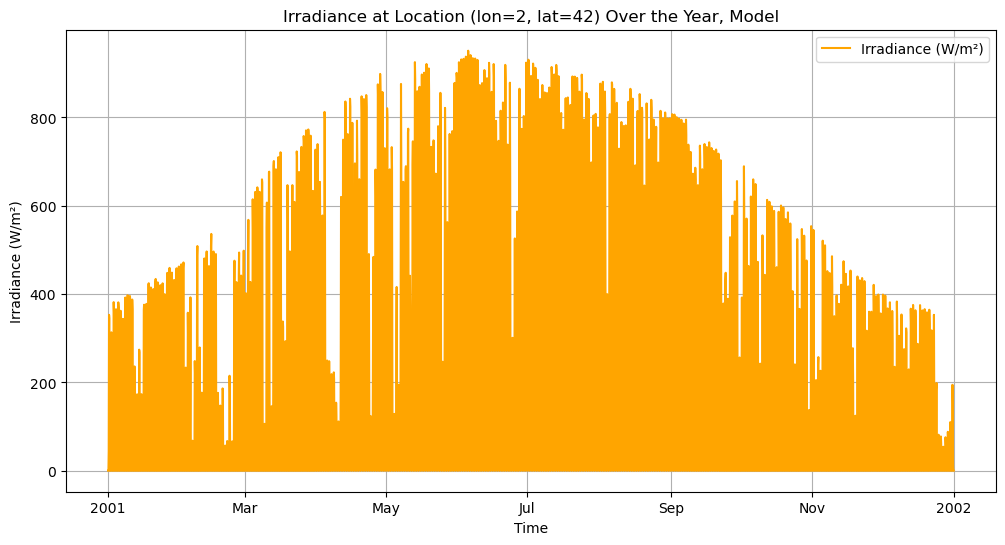

In [60]:
# Select the irradiance values for the specified location
irradiance_model = ds['rsds'].sel(lon=2, lat=42, method="nearest")

# Plot the irradiance values over time
plt.figure(figsize=(12, 6))
irradiance_model.plot(label="Irradiance (W/m²)", color="orange")
plt.title("Irradiance at Location (lon=2, lat=42) Over the Year, Model")
plt.xlabel("Time")
plt.ylabel("Irradiance (W/m²)")
plt.legend()
plt.grid()
plt.show()

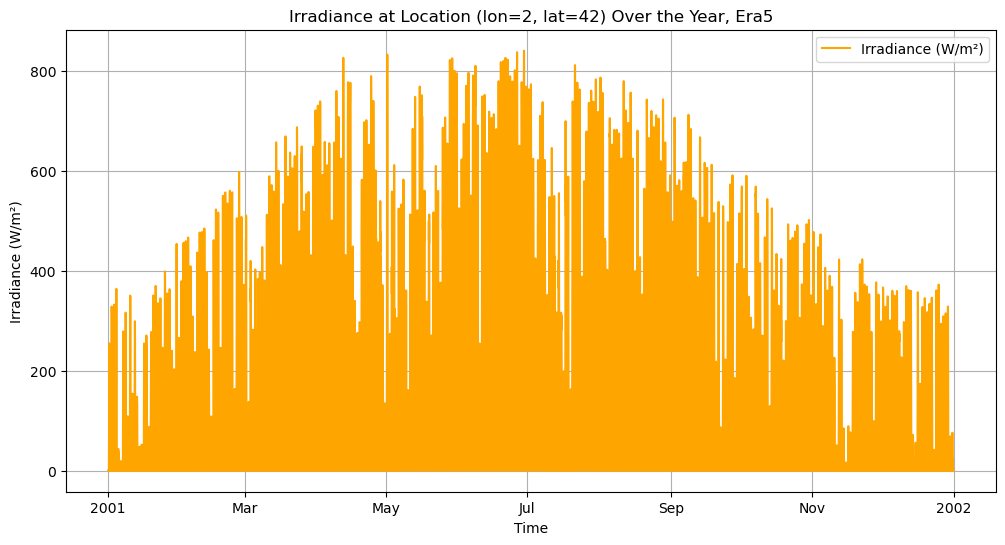

In [61]:
# Select the irradiance values for the specified location
irradiance_era5 = df['influx_direct'].sel(x=2, y=42, method="nearest")

# Plot the irradiance values over time
plt.figure(figsize=(12, 6))
irradiance_era5.plot(label="Irradiance (W/m²)", color="orange")
plt.title("Irradiance at Location (lon=2, lat=42) Over the Year, Era5")
plt.xlabel("Time")
plt.ylabel("Irradiance (W/m²)")
plt.legend()
plt.grid()
plt.show()